# Data Cleaning

In [1]:
#Importing Modules
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
#Reading and filtering files
games = pd.read_csv('Raw_Data\games.csv', index_col=['date'])
header = ['attendance', 'away_final_score', 'away_team', 'elapsed_time', 
          'home_final_score', 'home_team', 'start_time', 'venue_name',
          'weather', 'wind', 'delay']
games = games[7287:][header]   #only 2018 data is analyzed

#formatting dates to only month and date for the 2018 data
dates = pd.DatetimeIndex(games.index)
dates = dates.strftime('%B-%d')
games.index = dates

games.head()

,attendance,away_final_score,away_team,elapsed_time,home_final_score,home_team,start_time,venue_name,weather,wind,delay
date,,,,,,,,,,,
March-29,27764,5,ana,242,6,oak,1:07 PM,Oakland Coliseum,"73 degrees, partly cloudy","2 mph, Out to RF",0
March-29,31042,4,bos,180,6,tba,4:00 PM,Tropicana Field,"72 degrees, dome","0 mph, None",0
March-29,36517,14,cha,206,7,kca,3:16 PM,Kauffman Stadium,"45 degrees, overcast","10 mph, L to R",0
March-29,32151,8,chn,198,4,mia,12:43 PM,Marlins Park,"75 degrees, partly cloudy","16 mph, In from RF",0
March-29,47149,1,cle,155,2,sea,7:10 PM,Safeco Field,"55 degrees, cloudy","2 mph, In from CF",0


In [3]:
#Data Cleaning

#Venue_name of 'Angel Stadium' and 'Angel Stadium of Anaheim' are the same, will merge to be 'Angel Stadium'
games.venue_name[games.venue_name == 'Angel Stadium of Anaheim'] = 'Angel Stadium'

#The following three stadiums have less than 5 data points. Will be removed from this dataframe
#Stadiums: 'Hiram Bithorn Stadium', 'Estadio de Beisbol Monterrey', 'BB&T Ballpark'
index_name = games[games.venue_name == 'Hiram Bithorn Stadium'].index
games.drop(index_name, inplace=True)
index_name = games[games.venue_name == 'Estadio de Beisbol Monterrey'].index
games.drop(index_name, inplace=True)
index_name = games[games.venue_name == 'BB&T Ballpark'].index
games.drop(index_name, inplace=True)
#games[games.venue_name == 'Hiram Bithorn Stadium']


In [4]:
#Creating Column for Temperatures only
temps = []
for each in games['weather']:
    temps.append(int(each.split(' ')[0]))
games['temperature'] = temps

#Creating Column for Weather condition only
weather_type = []
for each in games['weather']:
    weather_type.append(each.split('degrees, ')[1])
games['weather_type'] = weather_type

#Creating Column for Wind Speed only
wind_speed = []
for each in games['wind']:
    wind_speed.append(int(each.split(' mph,')[0]))
games['wind_speed_mph'] = wind_speed

games.head()

,attendance,away_final_score,away_team,elapsed_time,home_final_score,home_team,start_time,venue_name,weather,wind,delay,temperature,weather_type,wind_speed_mph
date,,,,,,,,,,,,,,
March-29,27764,5,ana,242,6,oak,1:07 PM,Oakland Coliseum,"73 degrees, partly cloudy","2 mph, Out to RF",0,73,partly cloudy,2
March-29,31042,4,bos,180,6,tba,4:00 PM,Tropicana Field,"72 degrees, dome","0 mph, None",0,72,dome,0
March-29,36517,14,cha,206,7,kca,3:16 PM,Kauffman Stadium,"45 degrees, overcast","10 mph, L to R",0,45,overcast,10
March-29,32151,8,chn,198,4,mia,12:43 PM,Marlins Park,"75 degrees, partly cloudy","16 mph, In from RF",0,75,partly cloudy,16
March-29,47149,1,cle,155,2,sea,7:10 PM,Safeco Field,"55 degrees, cloudy","2 mph, In from CF",0,55,cloudy,2


# Temperature Analysis
Does weather affect the attendance of a game?

What weather conditions are each field most likely to have? 

What are the optimal weather conditions to win a game? (Based on team strengths?)  (find out mean temps for specific stadiums and see if team scores more at those temperatures at other stadiums)

How does elapsed time of a game vary with the weather conditions? Are specific fields more liekly to experience delays?

In [5]:
"""headers = ['attendance', 'away_final_score', 'away_team', 'elapsed_time', 
          'home_final_score', 'home_team', 'start_time', 'venue_name',
          'weather', 'wind', 'delay', 'temperature', 'weather_type', 'wind_speed_mph']"""
games.venue_name.unique()
venues = list(games.venue_name.unique())
len(venues)

30

In [6]:
header2 = ['attendance', 'away_final_score', 'away_team', 'elapsed_time', 
          'home_final_score', 'home_team', 'start_time', 'venue_name',
          'delay', 'temperature']

by_venue = games[header2].groupby('venue_name')
by_venue.get_group('Angel Stadium')

,attendance,away_final_score,away_team,elapsed_time,home_final_score,home_team,start_time,venue_name,delay,temperature
date,,,,,,,,,,
April-02,43904,6,cle,205,0,ana,7:07 PM,Angel Stadium,0,62
April-03,35007,2,cle,169,13,ana,7:08 PM,Angel Stadium,0,65
April-04,32412,2,cle,268,3,ana,1:08 PM,Angel Stadium,0,65
April-06,36023,9,oak,215,13,ana,7:07 PM,Angel Stadium,0,65
April-07,40129,7,oak,200,3,ana,6:08 PM,Angel Stadium,0,67
...,...,...,...,...,...,...,...,...,...,...
September-25,36308,1,tex,181,4,ana,7:09 PM,Angel Stadium,0,70
September-26,35991,2,tex,161,3,ana,7:07 PM,Angel Stadium,0,72
September-28,35041,5,oak,197,8,ana,7:08 PM,Angel Stadium,0,70


# Temperature vs Attendance


Text(85, 38527, 'polyfit function')

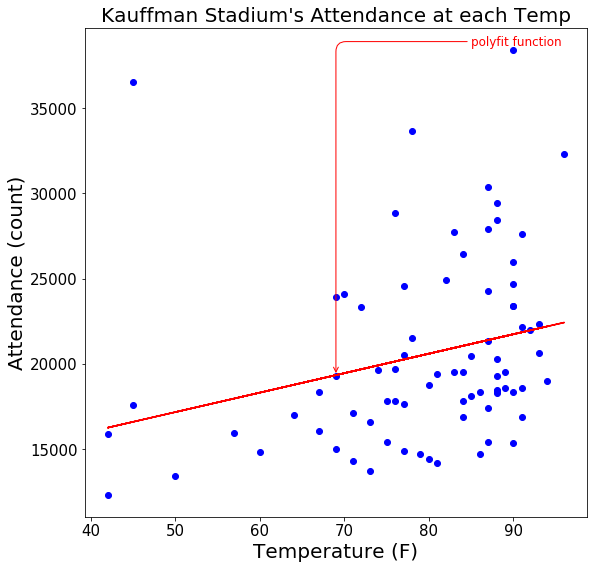

In [7]:
#Graphing temperature versus attendance at one venue

fig, axs = plt.subplots(figsize=(9,9))

nopatterns=['Dodger Stadium', 'Wrigley Field']
patterns=['Fenway Park', 'Kauffman Stadium']

name = patterns[1]
#name = nopatterns[1]
x = by_venue.get_group(name).temperature
y = by_venue.get_group(name).attendance
axs.scatter(x,y,color='b')

axs.set_title("{}'s Attendance at each Temp".format(name),fontsize=20)
axs.set_xlabel('Temperature (F)', fontsize=20)
plt.xticks(fontsize=15, color='black')
axs.set_ylabel('Attendance (count)', fontsize=20)
plt.yticks(fontsize=15, color='black')

coef=np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef)
axs.plot(x,poly1d_fn(x), color='r')  

min_temp = games.temperature[games.venue_name==name].min()
max_temp = games.temperature[games.venue_name==name].max()
deltah=min_temp+(max_temp-min_temp)/2
att_at_temp = games.attendance[games.venue_name==name].max()

axs.annotate('polyfit function', xy=(int(deltah),int(poly1d_fn(deltah))), xytext=(max_temp-11,att_at_temp+100), fontsize=12,color='red',
             arrowprops=dict(arrowstyle='->',color='red', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
             horizontalalignment='left', verticalalignment='bottom')

C:\Users\johnl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


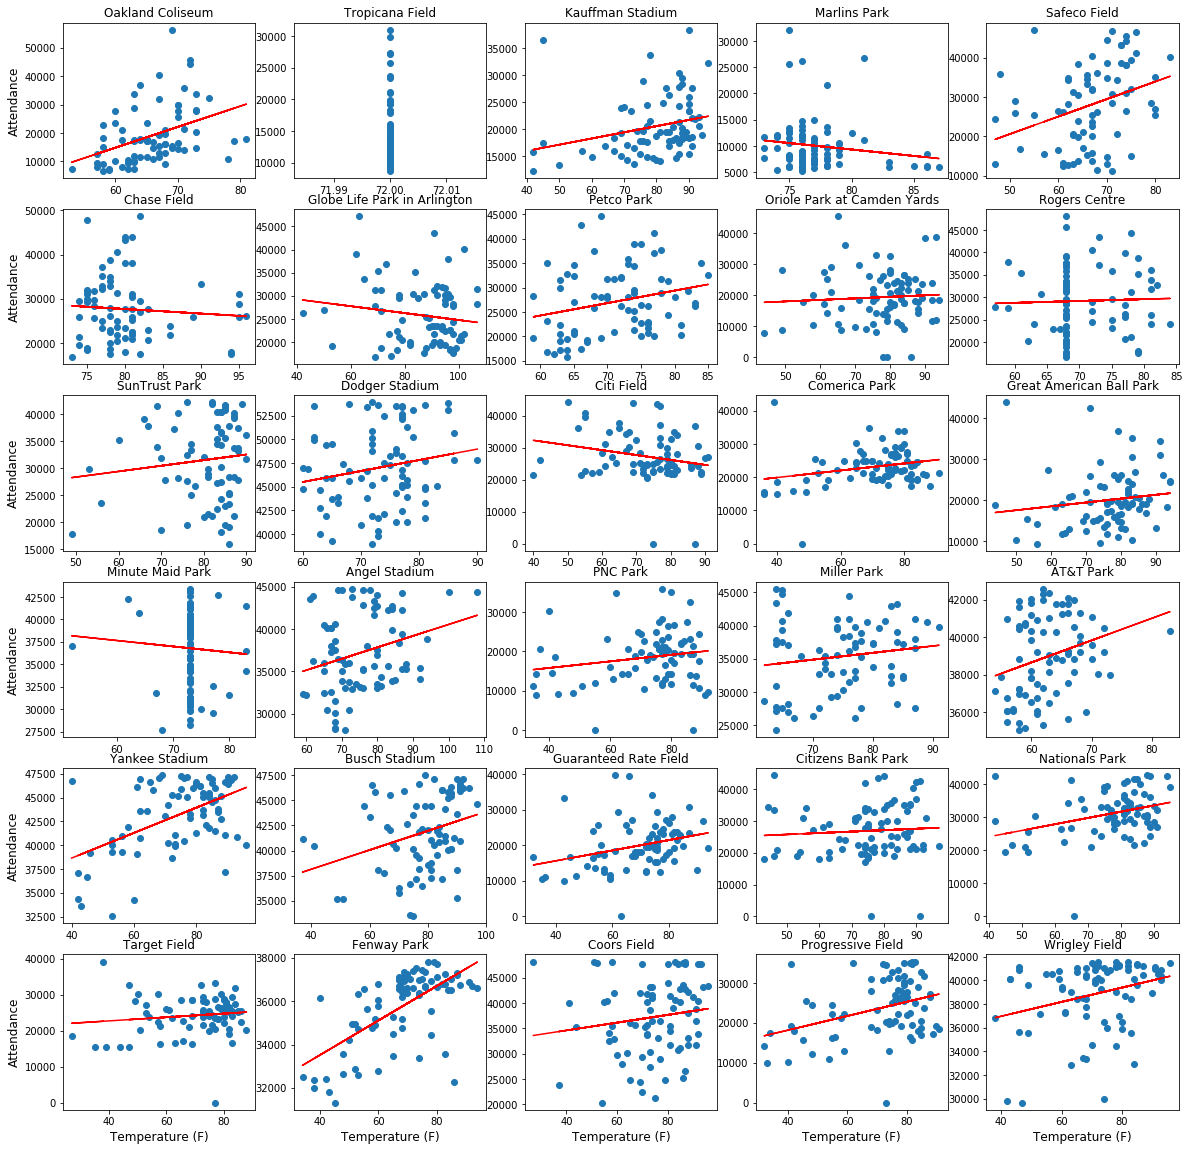

In [8]:
#Graphing temperature versus attendance at each venue

fig, axs = plt.subplots(6,5, figsize=(20,20))
count=0

for i in range(0,6):
    for j in range(0,5):
        x = by_venue.get_group(venues[count]).temperature
        y = by_venue.get_group(venues[count]).attendance
        axs[i,j].scatter(x,y)
        axs[i,j].set_title(venues[count], fontsize=12)
        axs[i,0].set_ylabel('Attendance', fontsize=12)
        axs[5,j].set_xlabel('Temperature (F)', fontsize=12)
        
        coef=np.polyfit(x,y,1)
        poly1d_fn = np.poly1d(coef)
        axs[i,j].plot(x,poly1d_fn(x), color='r')    
        
        count+=1

# Temperature vs Time (elapsed & delay)


C:\Users\johnl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


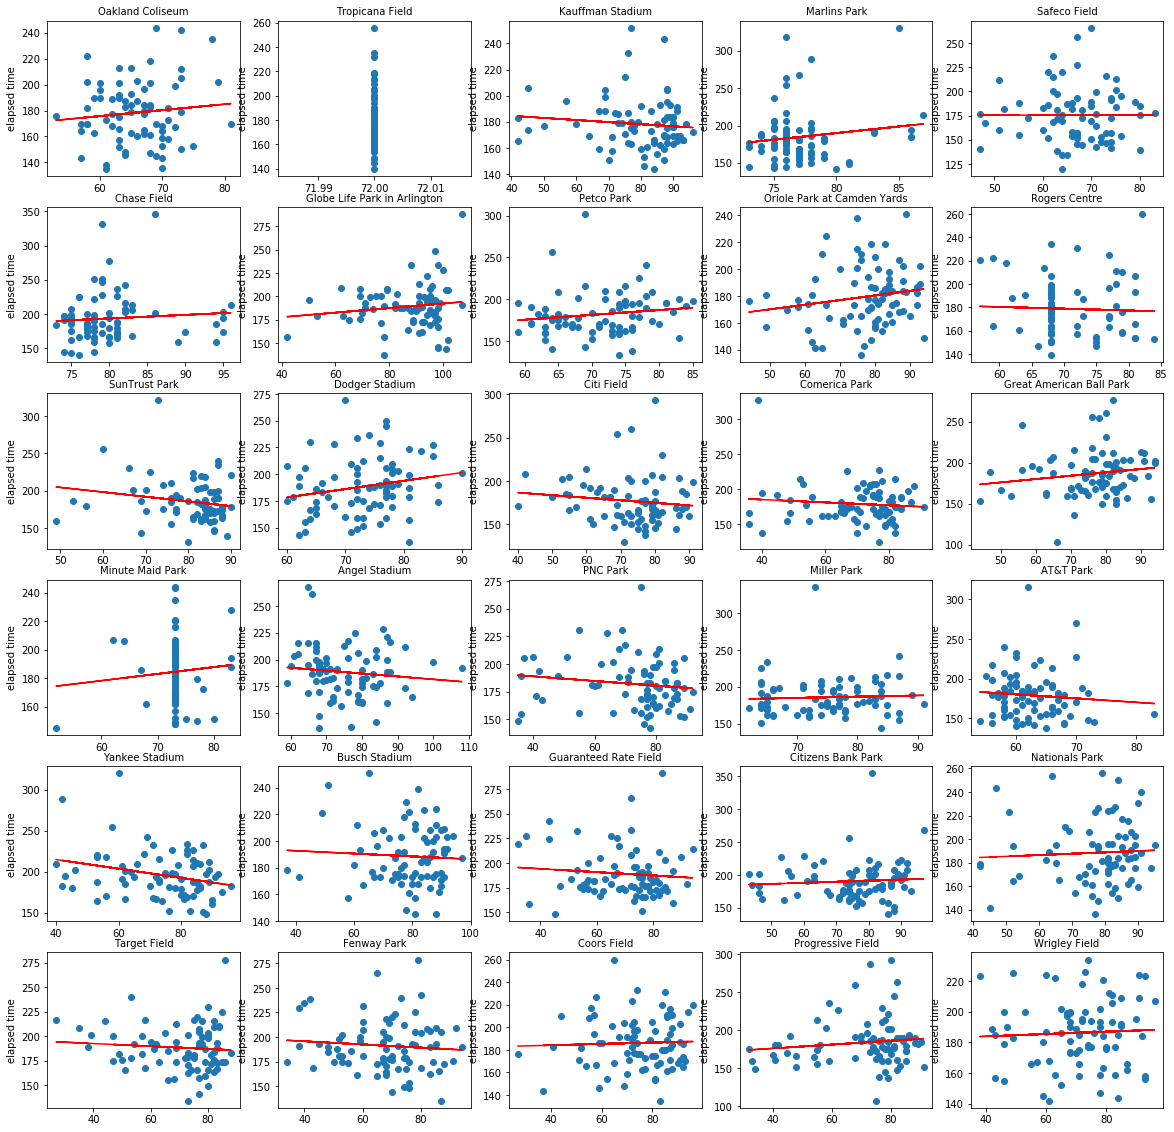

In [9]:
#Graphing temperature versus elapsed time at each venue

fig, axs = plt.subplots(6,5, figsize=(20,20))
count=0

for i in range(0,6):
    for j in range(0,5):
        x = by_venue.get_group(venues[count]).temperature
        y = by_venue.get_group(venues[count]).elapsed_time
        axs[i,j].scatter(x,y)
        axs[i,j].set_title(venues[count], fontsize=10)
        axs[i,j].set_ylabel('elapsed time', fontsize=10)

        coef=np.polyfit(x,y,1)
        poly1d_fn = np.poly1d(coef)
        axs[i,j].plot(x,poly1d_fn(x), color='r')    
        
        count+=1


Text(45, 100, 'Avg Delay=69min')

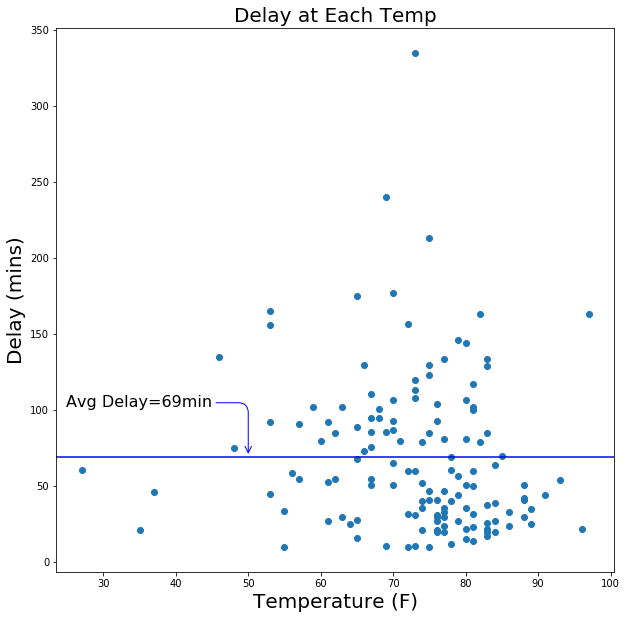

In [10]:
#Graphing temperature versus elapsed time at all venues

games_rmv_outdelay = games[(games.delay < 1700) & (games.delay > 0)]

fig, axs = plt.subplots(figsize=(10,10))

x=games.temperature
y=games.delay
x=games_rmv_outdelay.temperature
y=games_rmv_outdelay.delay
axs.scatter(x,y)

axs.set_title('Delay at Each Temp',fontsize=20)
axs.set_xlabel('Temperature (F)', fontsize=20)
axs.set_ylabel('Delay (mins)', fontsize=20)

y_average=games[(games.delay < 1700) & (games.delay > 0)].delay.mean()
plt.axhline(y=y_average, color='b')

axs.annotate('Avg Delay={}min'.format(int(y_average)), xy=(50,70), xytext=(45,100), fontsize=16,
             arrowprops=dict(arrowstyle='->',color='blue', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
             horizontalalignment='right', verticalalignment='bottom')      

# coef=np.polyfit(x,y,1)
# poly1d_fn = np.poly1d(coef)
# axs.plot(x,poly1d_fn(x), color='r')   

Text(105, 95, 'Avg Elapsed Time=184min')

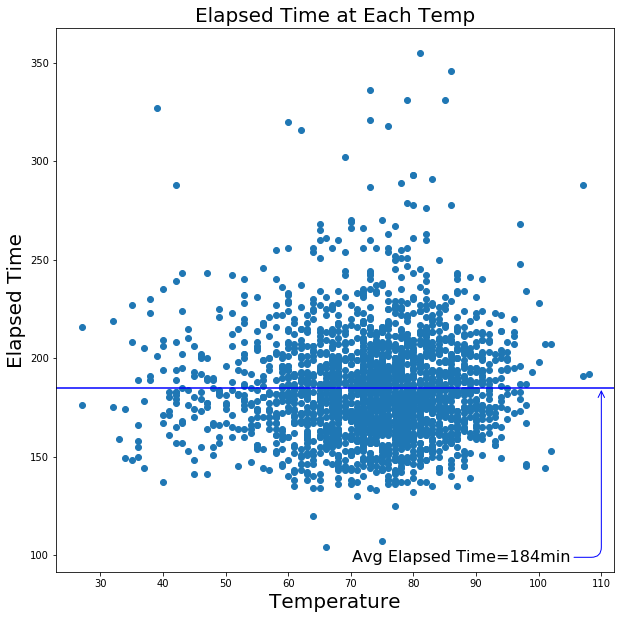

In [11]:
#Graphing temperature versus delay at all venues

fig, axs = plt.subplots(figsize=(10,10))

x=games.temperature
y=games.elapsed_time
axs.scatter(x,y)

axs.set_title('Elapsed Time at Each Temp',fontsize=20)
axs.set_xlabel('Temperature', fontsize=20)
axs.set_ylabel('Elapsed Time', fontsize=20)

y_average=games.elapsed_time.mean()
plt.axhline(y=y_average, color='b')

axs.annotate('Avg Elapsed Time={}min'.format(int(y_average)), xy=(110,y_average), xytext=(105,95), fontsize=16, 
             arrowprops=dict(arrowstyle='->',color='blue', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
             horizontalalignment='right', verticalalignment='bottom')       



In [12]:
by_venue_mean = games[header2].groupby('venue_name').mean()
by_venue_mean.head()

,attendance,away_final_score,elapsed_time,home_final_score,delay,temperature
venue_name,,,,,,
AT&T Park,"38,965.25",4.12,179.06,3.96,0.20,62.69
Angel Stadium,"37,226.41",4.25,188.10,4.48,0.59,75.52
Busch Stadium,"41,812.49",4.32,188.69,4.35,31.23,78.34
Chase Field,"27,655.28",4.11,193.72,4.58,0.29,80.13
Citi Field,"27,289.42",3.78,176.86,3.32,9.17,72.86


Text(0.5, 0, 'temperature')

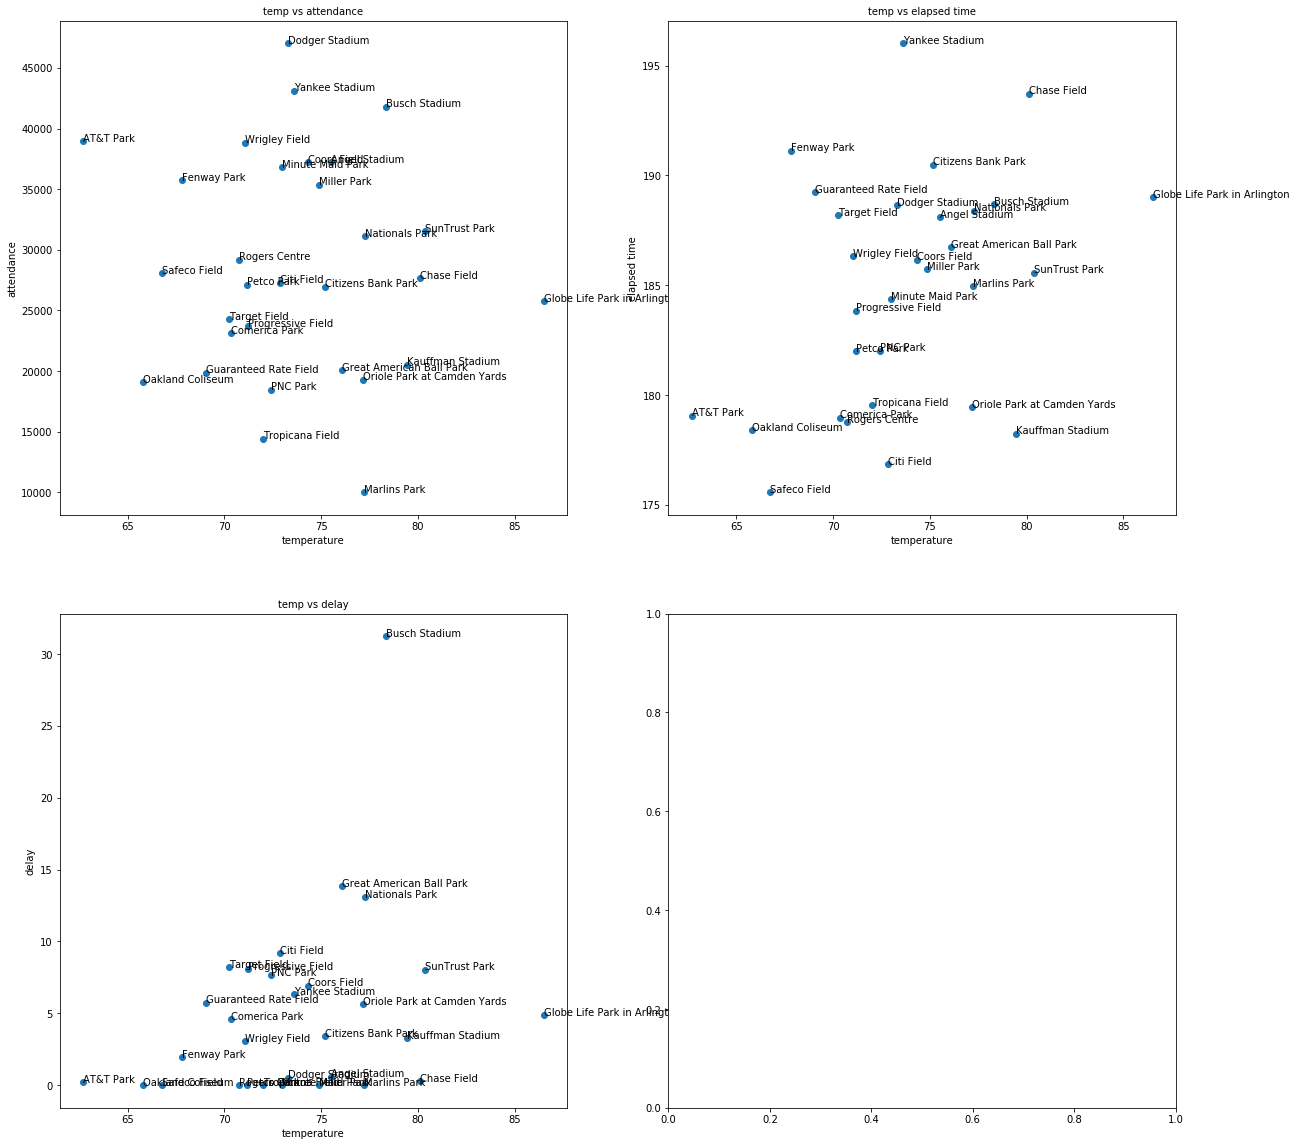

In [13]:
fig, axs = plt.subplots(2,2, figsize=(20,20))

#Graphing mean temperature versus mean attendance at each venue
x = by_venue_mean.temperature
y = by_venue_mean.attendance
axs[0,0].scatter(x, y)
for i, txt in enumerate(by_venue_mean.index):
    axs[0,0].annotate(txt, xy=(x[i],y[i]))
axs[0,0].set_title('temp vs attendance', fontsize=10)
axs[0,0].set_ylabel('attendance', fontsize=10)
axs[0,0].set_xlabel('temperature', fontsize=10)
    
#Graphing mean temperature versus mean elapsed time at each venue
x = by_venue_mean.temperature
y = by_venue_mean.elapsed_time
axs[0,1].scatter(x, y)
for i, txt in enumerate(by_venue_mean.index):
    axs[0,1].annotate(txt, xy=(x[i],y[i]))
axs[0,1].set_title('temp vs elapsed time', fontsize=10)
axs[0,1].set_ylabel('elapsed time', fontsize=10)
axs[0,1].set_xlabel('temperature', fontsize=10)

#Graphing mean temperature versus mean delay at each venue
x = by_venue_mean.temperature
y = by_venue_mean.delay
axs[1,0].scatter(x, y)
for i, txt in enumerate(by_venue_mean.index):
    axs[1,0].annotate(txt, xy=(x[i],y[i]))    
axs[1,0].set_title('temp vs delay', fontsize=10)
axs[1,0].set_ylabel('delay', fontsize=10)
axs[1,0].set_xlabel('temperature', fontsize=10)

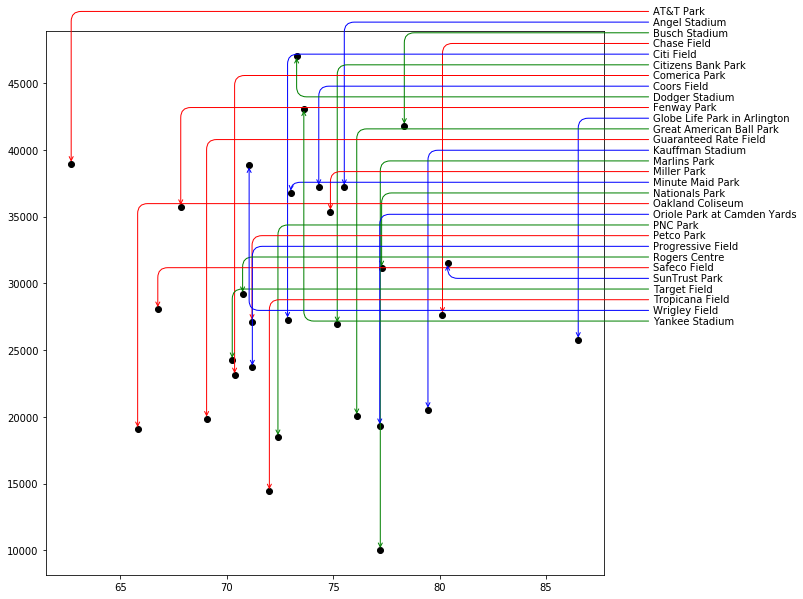

In [14]:
#Graphing mean temperature versus mean elapsed time at each venue

fig, axs = plt.subplots(figsize=(10,10))
x = by_venue_mean.temperature
y = by_venue_mean.attendance
axs.scatter(x, y, color='black')
colors = ['r','b','g','r','b','g','r','b','g','r','b','g','r','b','g',
          'r','b','g','r','b','g','r','b','g','r','b','g','r','b','g']
j=0
k=0

for i, txt in enumerate(by_venue_mean.index):
    axs.annotate(txt, xy=(x[i],y[i]), xytext=(90,50000-j), arrowprops=dict(arrowstyle='->',color=colors[k], connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
                 horizontalalignment='left', verticalalignment='bottom')
    j+=800
    k+=1

# Temperature vs Venue

In [15]:
by_venue_temp_mean = games[header2].groupby('venue_name').temperature.agg(['mean']).sort_values('mean', ascending=False)
aa=by_venue_temp_mean.head(5)
aa.columns=['Top 5 Hottest Avg. Temps']
aa

,Top 5 Hottest Avg. Temps
venue_name,
Globe Life Park in Arlington,86.51
SunTrust Park,80.37
Chase Field,80.13
Kauffman Stadium,79.45
Busch Stadium,78.34


In [16]:
by_venue_temp_mean = games[header2].groupby('venue_name').temperature.agg(['mean']).sort_values('mean')
ab=by_venue_temp_mean.head(5)
ab.columns=['Top 5 Coldest Avg. Temps']
ab

,Top 5 Coldest Avg. Temps
venue_name,
AT&T Park,62.69
Oakland Coliseum,65.81
Safeco Field,66.76
Fenway Park,67.84
Guaranteed Rate Field,69.05


In [17]:
#Creating a dictionary of home games and team names
by_home_team = games.groupby('home_team')
team=list(games.home_team.unique())
team_venue_name = {}  #the dictionary
for each in team:
    team_venue_name[each] = [str(by_home_team.get_group(each).venue_name[0])]
print(team_venue_name)

{'oak': ['Oakland Coliseum'], 'tba': ['Tropicana Field'], 'kca': ['Kauffman Stadium'], 'mia': ['Marlins Park'], 'sea': ['Safeco Field'], 'ari': ['Chase Field'], 'tex': ['Globe Life Park in Arlington'], 'sdn': ['Petco Park'], 'bal': ['Oriole Park at Camden Yards'], 'tor': ['Rogers Centre'], 'atl': ['SunTrust Park'], 'lan': ['Dodger Stadium'], 'nyn': ['Citi Field'], 'det': ['Comerica Park'], 'cin': ['Great American Ball Park'], 'hou': ['Minute Maid Park'], 'ana': ['Angel Stadium'], 'pit': ['PNC Park'], 'mil': ['Miller Park'], 'sfn': ['AT&T Park'], 'nya': ['Yankee Stadium'], 'sln': ['Busch Stadium'], 'cha': ['Guaranteed Rate Field'], 'phi': ['Citizens Bank Park'], 'was': ['Nationals Park'], 'min': ['Target Field'], 'bos': ['Fenway Park'], 'col': ['Coors Field'], 'cle': ['Progressive Field'], 'chn': ['Wrigley Field']}


In [18]:
games.head()
avg_away_score = games[games.away_team == name].away_final_score.mean()
print(avg_away_score)

nan


Text(31, 4, 'avg away score=3.33')

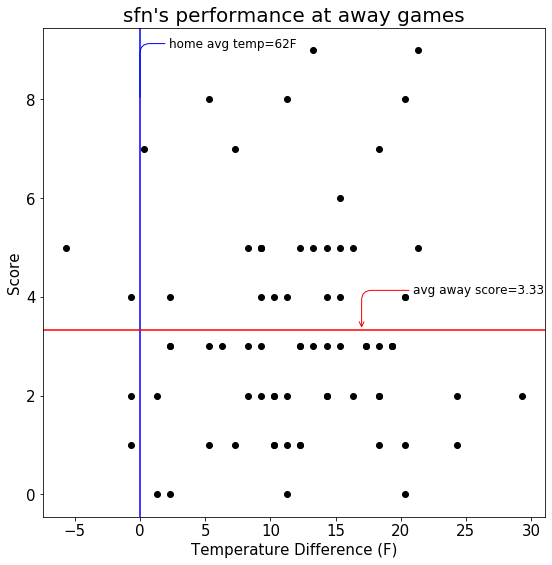

In [19]:
#Performance of San Francisco Giants at all other venues (assumes that Giants play well in 63 degree weather)
by_away_team = games.groupby('away_team')

name='sfn'
team_home_venue_avg_temp = float(by_venue_mean.temperature[by_venue_mean.index == team_venue_name[name][0]])
avg_away_score = games[games.away_team == name].away_final_score.mean()

#Graphing Giants away_final_score at other venues
fig, axs = plt.subplots(figsize=(9,9))
x = by_away_team.get_group(name).temperature - team_home_venue_avg_temp
y = by_away_team.get_group(name).away_final_score
y_average = by_away_team.get_group(name).away_final_score.mean()

axs.scatter(x, y, color='black')
axs.axvline(x=0, color='b')
plt.axhline(y=y_average, color='r')

axs.set_title("{}'s performance at away games".format(name), fontsize=20)
axs.set_xlabel('Temperature Difference (F)', fontsize=15)
axs.set_ylabel('Score', fontsize=15)
plt.xticks(fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
        
axs.annotate('home avg temp={}F'.format(int(team_home_venue_avg_temp)), xy=(0,8), xytext=(12,9), fontsize=12, 
             arrowprops=dict(arrowstyle='-',color='blue', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
             horizontalalignment='right', verticalalignment='bottom')

axs.annotate('avg away score={:.2f}'.format(avg_away_score), xy=(17,avg_away_score), xytext=(31,4), fontsize=12,
            arrowprops=dict(arrowstyle='->',color='r', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
             horizontalalignment='right', verticalalignment='bottom')      

Text(-30, 6, 'avg away score=4.54')

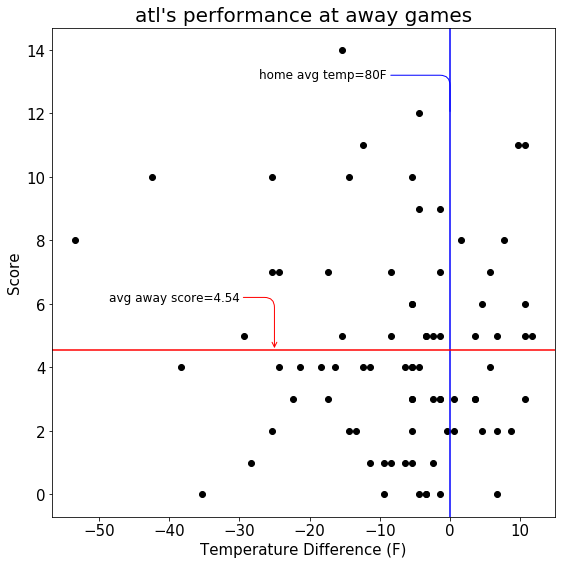

In [20]:
#Performance of atl at all other venues (assumes that Giants play well in 63 degree weather)
by_away_team = games.groupby('away_team')

name='atl'
team_home_venue_avg_temp = float(by_venue_mean.temperature[by_venue_mean.index == team_venue_name[name][0]])
avg_away_score = games[games.away_team == name].away_final_score.mean()

#Graphing Giants away_final_score at other venues
fig, axs = plt.subplots(figsize=(9,9))
x = by_away_team.get_group(name).temperature - team_home_venue_avg_temp
y = by_away_team.get_group(name).away_final_score
y_average = by_away_team.get_group(name).away_final_score.mean()

axs.scatter(x, y, color='black')
axs.axvline(x=0, color='b')
plt.axhline(y=y_average, color='r')

axs.set_title("{}'s performance at away games".format(name), fontsize=20)
axs.set_xlabel('Temperature Difference (F)', fontsize=15)
axs.set_ylabel('Score', fontsize=15)
plt.xticks(fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
        
axs.annotate('home avg temp={}F'.format(int(team_home_venue_avg_temp)), xy=(0,12), xytext=(-9,13), fontsize=12, 
             arrowprops=dict(arrowstyle='-',color='blue', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
             horizontalalignment='right', verticalalignment='bottom')   

axs.annotate('avg away score={:.2f}'.format(avg_away_score), xy=(-25,avg_away_score), xytext=(-30,6), fontsize=12,
            arrowprops=dict(arrowstyle='->',color='r', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
             horizontalalignment='right', verticalalignment='bottom')  

Text(-29, 4.4, 'avg away score=3.75')

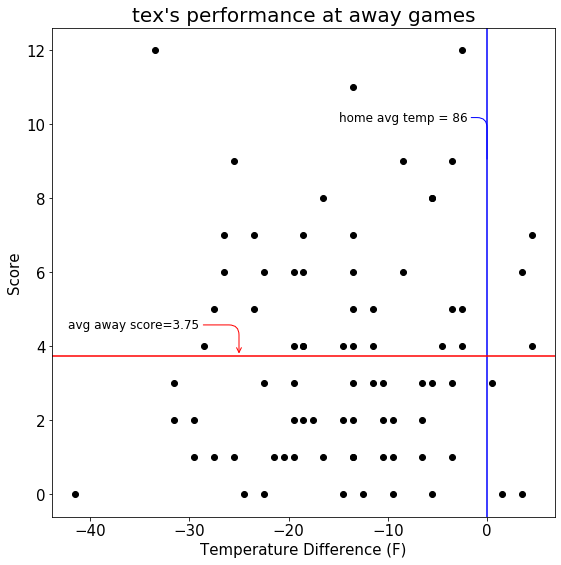

In [21]:
#Performance of Texas at all other venues (assumes that Giants play well in 63 degree weather)
by_away_team = games.groupby('away_team')

name='tex'
team_home_venue_avg_temp = float(by_venue_mean.temperature[by_venue_mean.index == team_venue_name[name][0]])
avg_away_score = games[games.away_team == name].away_final_score.mean()

#Graphing Giants away_final_score at other venues
fig, axs = plt.subplots(figsize=(9,9))
x = by_away_team.get_group(name).temperature - team_home_venue_avg_temp
y = by_away_team.get_group(name).away_final_score
y_average = by_away_team.get_group(name).away_final_score.mean()

axs.scatter(x, y, color='black')
axs.axvline(x=0, color='b')
plt.axhline(y=y_average, color='r')

axs.set_title("{}'s performance at away games".format(name), fontsize=20)
axs.set_xlabel('Temperature Difference (F)', fontsize=15)
axs.set_ylabel('Score', fontsize=15)
plt.xticks(fontsize=15, color='black')
plt.yticks(fontsize=15, color='black')
        
axs.annotate('home avg temp = {}'.format(int(team_home_venue_avg_temp)), xy=(0,9), xytext=(-2,10), fontsize=12, 
             arrowprops=dict(arrowstyle='-',color='blue', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
             horizontalalignment='right', verticalalignment='bottom')       

axs.annotate('avg away score={:.2f}'.format(avg_away_score), xy=(-25,avg_away_score), xytext=(-29,4.4), fontsize=12,
            arrowprops=dict(arrowstyle='->',color='r', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
             horizontalalignment='right', verticalalignment='bottom')  

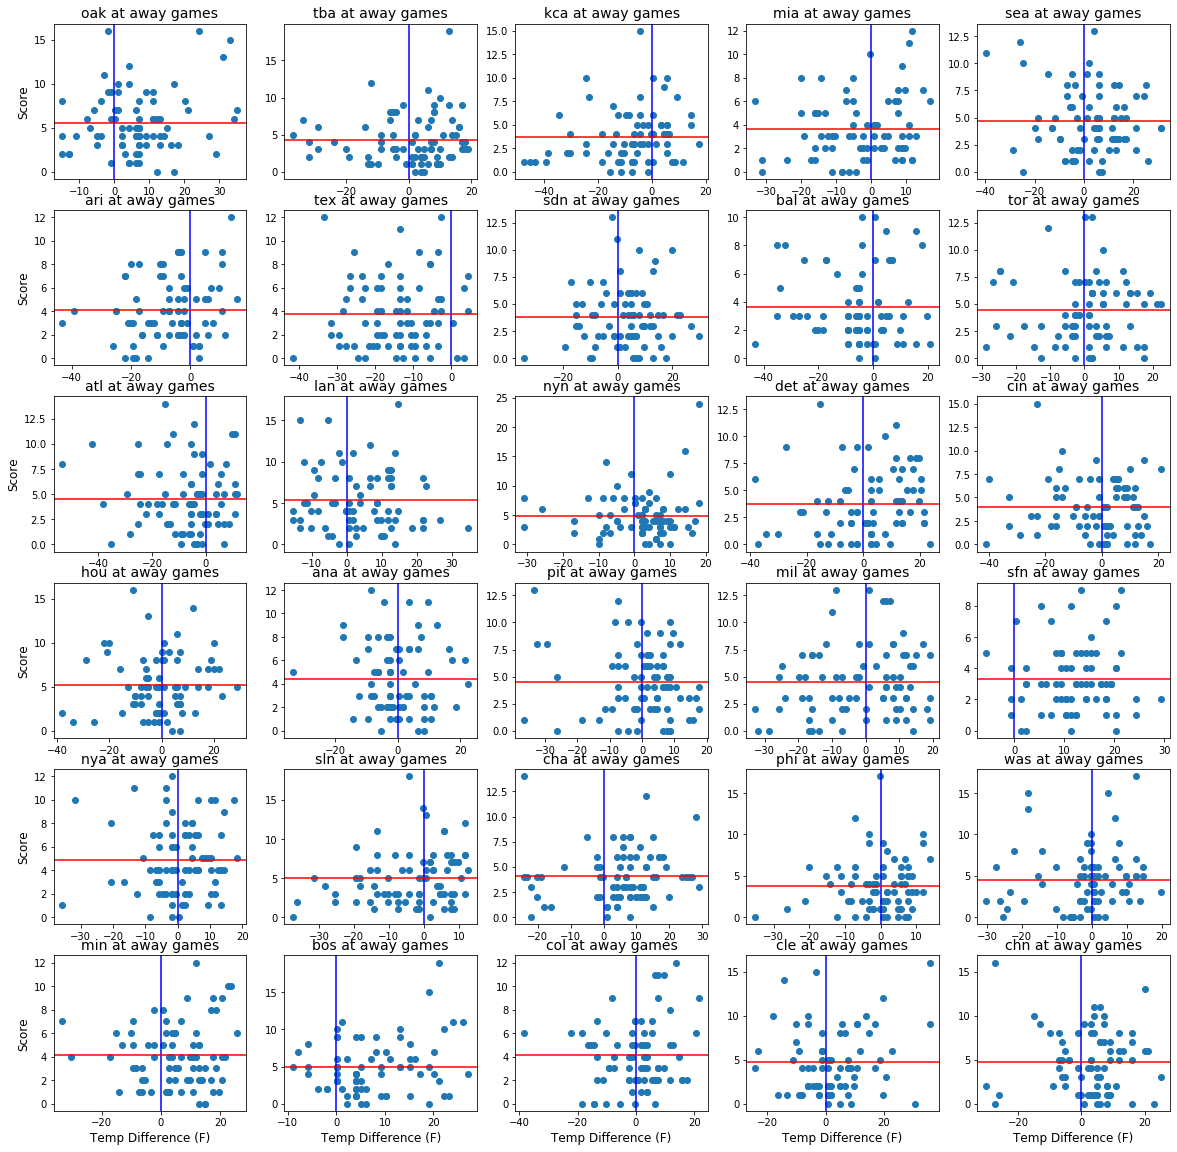

In [22]:
teams=list(team_venue_name.keys())

#Performance of each team at all other venues (assumes that each team plays well in their own venue's average degree weather)
by_away_team = games.groupby('away_team')

#Graphing Giants away_final_score at other venues
fig, axs = plt.subplots(6,5, figsize=(20,20))
count = 0

for i in range(0,6):
    for j in range(0,5):
        team_home_venue_avg_temp = float(by_venue_mean.temperature[by_venue_mean.index == team_venue_name[teams[count]][0]])
        #print(team_home_venue_avg_temp)

        x = by_away_team.get_group(teams[count]).temperature - team_home_venue_avg_temp
        y = by_away_team.get_group(teams[count]).away_final_score
        y_average = by_away_team.get_group(teams[count]).away_final_score.mean()
        axs[i,j].scatter(x,y)
        axs[i,j].set_title(teams[count]+' at away games', fontsize=14)
        axs[i,0].set_ylabel('Score', fontsize=12)
        axs[5,j].set_xlabel('Temp Difference (F)', fontsize=12)

        team_home_venue_avg_temp = float(by_venue_mean.temperature[by_venue_mean.index == team_venue_name[teams[count]][0]])
        axs[i,j].axvline(x=0, color='b')
        axs[i,j].axhline(y=y_average, color='r')        
        
#         axs[i,j].annotate('avg temp', xy=(0,8), xytext=(-2,10), 
#                      arrowprops=dict(arrowstyle='-',color='blue', connectionstyle='angle,angleA=0, angleB=-90, rad=10'), 
#                      horizontalalignment='right', verticalalignment='bottom')                
        count+=1

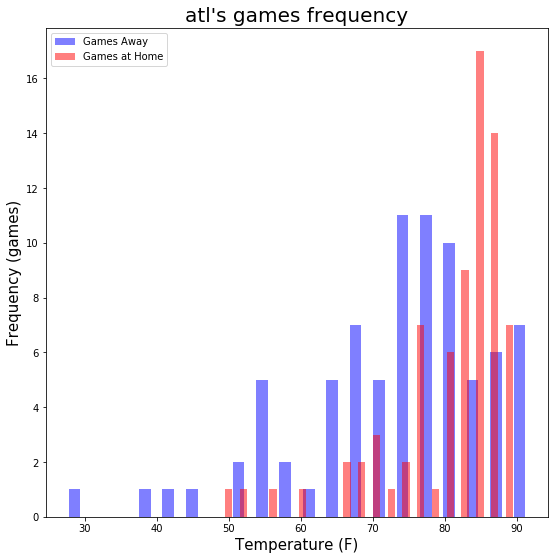

In [23]:
#Histogram of specific teams' away games's average temperature
by_away_team = games.groupby('away_team')
by_home_team = games.groupby('home_team')
name='atl'

#Graphing Histogram of Giant's away games' temperatures
fig, axs = plt.subplots(figsize=(9,9))
axs.hist(by_away_team.get_group(name).temperature, bins=20, color='b', rwidth=0.5, alpha=0.5)
axs.hist(by_home_team.get_group(name).temperature, bins=20, color='r', rwidth=0.5, alpha=0.5)

#Labeling
axs.set_title("{}'s games frequency".format(name), fontsize=20)
axs.set_ylabel('Frequency (games)', fontsize=15)
axs.set_xlabel('Temperature (F)', fontsize=15)
plt.legend(['Games Away','Games at Home'])

In [30]:
by_away_team.head()

,attendance,away_final_score,away_team,elapsed_time,home_final_score,home_team,start_time,venue_name,weather,wind,delay,temperature,weather_type,wind_speed_mph
date,,,,,,,,,,,,,,
March-29,27764,5,ana,242,6,oak,1:07 PM,Oakland Coliseum,"73 degrees, partly cloudy","2 mph, Out to RF",0,73,partly cloudy,2
March-29,31042,4,bos,180,6,tba,4:00 PM,Tropicana Field,"72 degrees, dome","0 mph, None",0,72,dome,0
March-29,36517,14,cha,206,7,kca,3:16 PM,Kauffman Stadium,"45 degrees, overcast","10 mph, L to R",0,45,overcast,10
March-29,32151,8,chn,198,4,mia,12:43 PM,Marlins Park,"75 degrees, partly cloudy","16 mph, In from RF",0,75,partly cloudy,16
March-29,47149,1,cle,155,2,sea,7:10 PM,Safeco Field,"55 degrees, cloudy","2 mph, In from CF",0,55,cloudy,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
April-11,35596,5,pit,179,13,chn,7:08 PM,Wrigley Field,"46 degrees, overcast","8 mph, R to L",0,46,overcast,8
April-12,22288,7,sfn,167,0,sdn,7:10 PM,Petco Park,"63 degrees, clear","12 mph, L to R",0,63,clear,12
April-13,32129,2,tex,170,3,hou,7:10 PM,Minute Maid Park,"73 degrees, roof closed","0 mph, None",0,73,roof closed,0


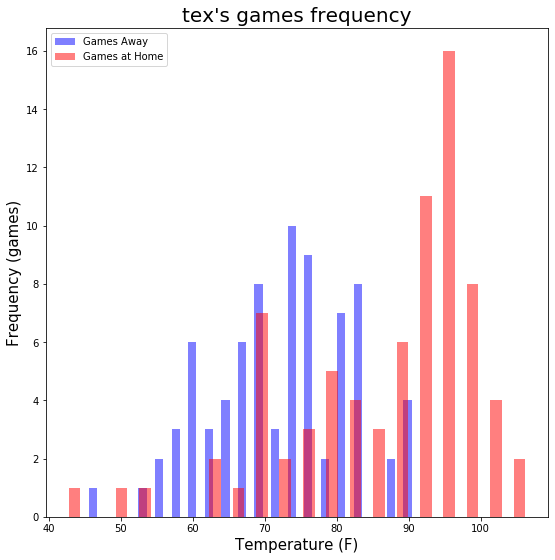

In [24]:
#Histogram of specific teams' away games's average temperature
by_away_team = games.groupby('away_team')
by_home_team = games.groupby('home_team')
name='tex'

#Graphing Histogram of Giant's away games' temperatures
fig, axs = plt.subplots(figsize=(9,9))
away = axs.hist(by_away_team.get_group(name).temperature, bins=20, color='b', rwidth=0.5, alpha=0.5)
home = axs.hist(by_home_team.get_group(name).temperature, bins=20, color='r', rwidth=0.5, alpha=0.5)

#Labeling
axs.set_title("{}'s games frequency".format(name), fontsize=20)
axs.set_ylabel('Frequency (games)', fontsize=15)
axs.set_xlabel('Temperature (F)', fontsize=15)
plt.legend(['Games Away','Games at Home'])

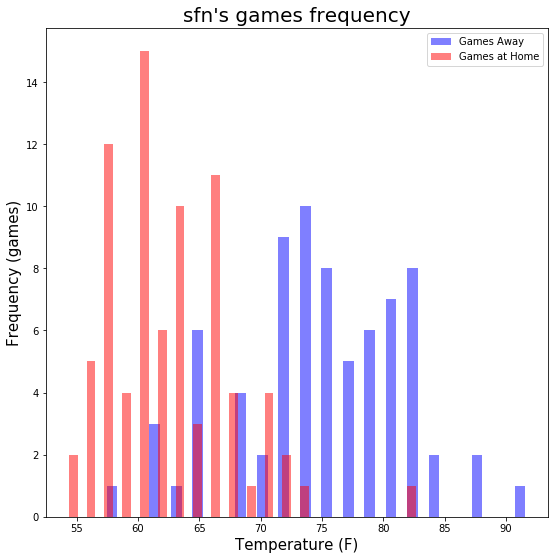

In [25]:
#Histogram of specific teams' away games's average temperature
by_away_team = games.groupby('away_team')
by_home_team = games.groupby('home_team')
name='sfn'

#Graphing Histogram of Giant's away games' temperatures
fig, axs = plt.subplots(figsize=(9,9))
away = axs.hist(by_away_team.get_group(name).temperature, bins=20, color='b', rwidth=0.5, alpha=0.5)
home = axs.hist(by_home_team.get_group(name).temperature, bins=20, color='r', rwidth=0.5, alpha=0.5)

#Labeling
axs.set_title("{}'s games frequency".format(name), fontsize=20)
axs.set_ylabel('Frequency (games)', fontsize=15)
axs.set_xlabel('Temperature (F)', fontsize=15)
plt.legend(['Games Away','Games at Home'])

C:\Users\johnl\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


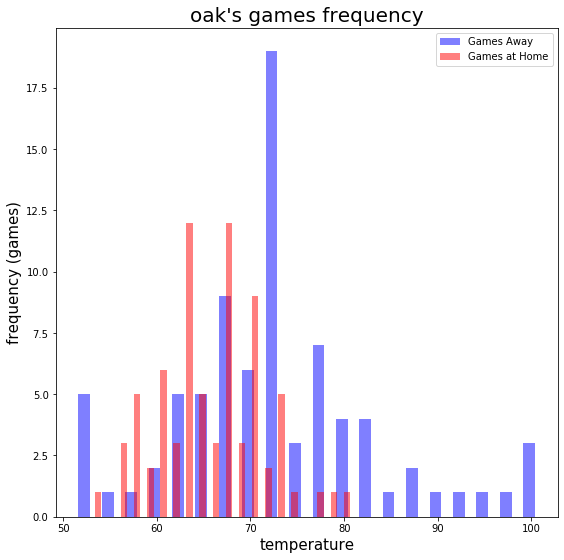

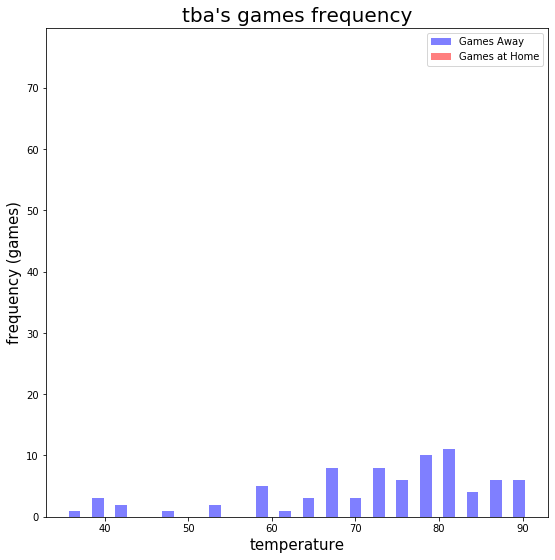

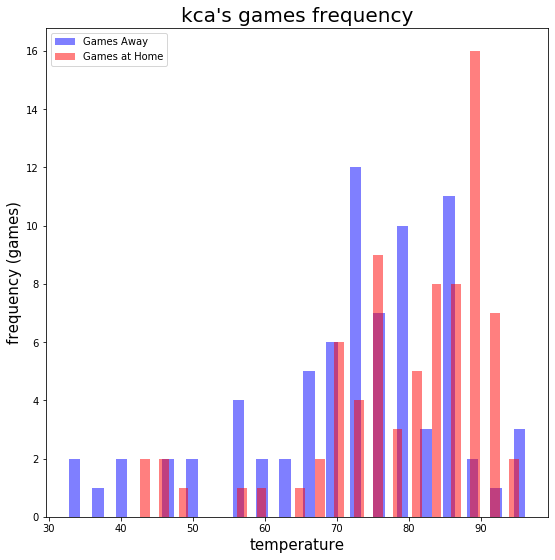

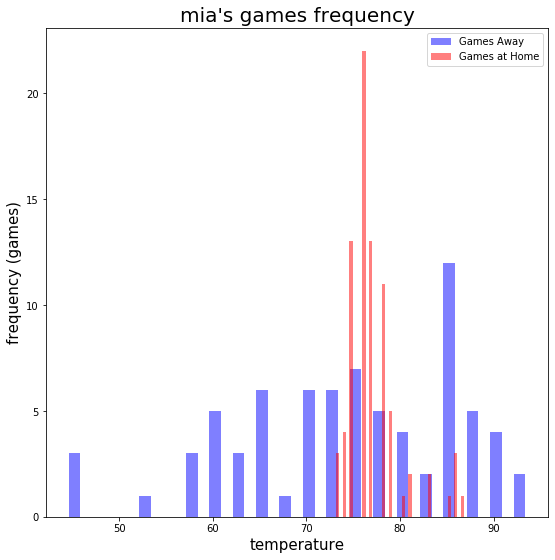

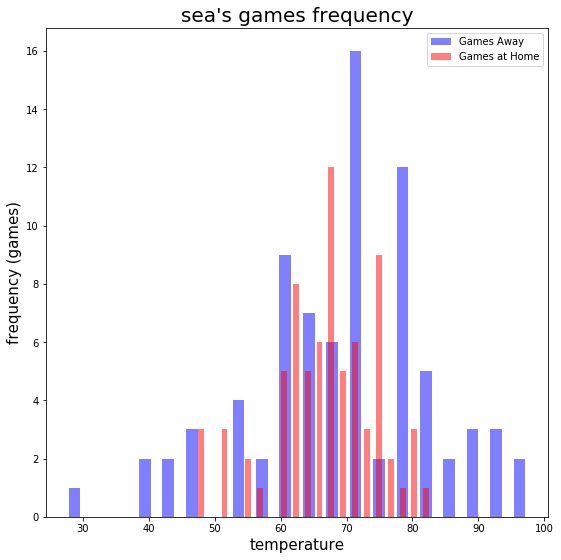

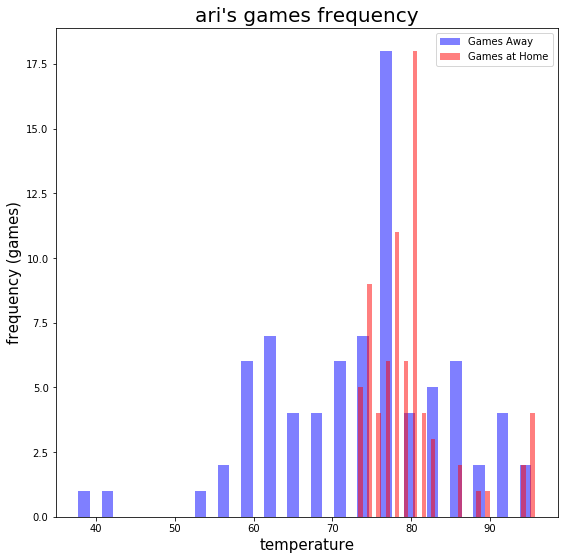

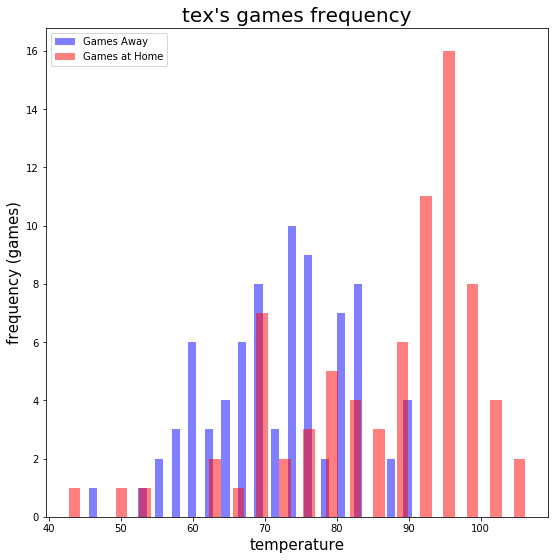

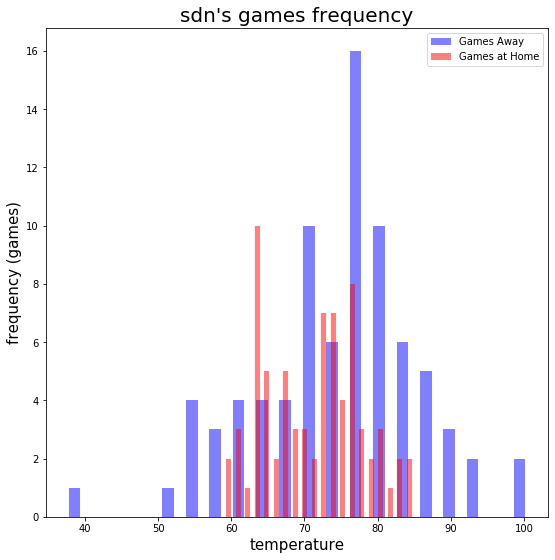

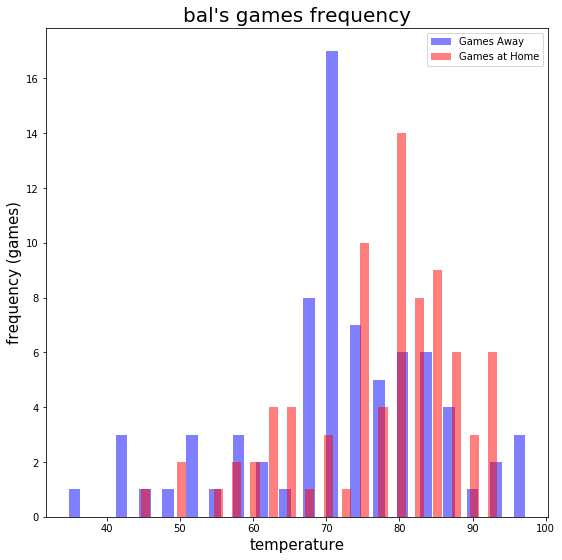

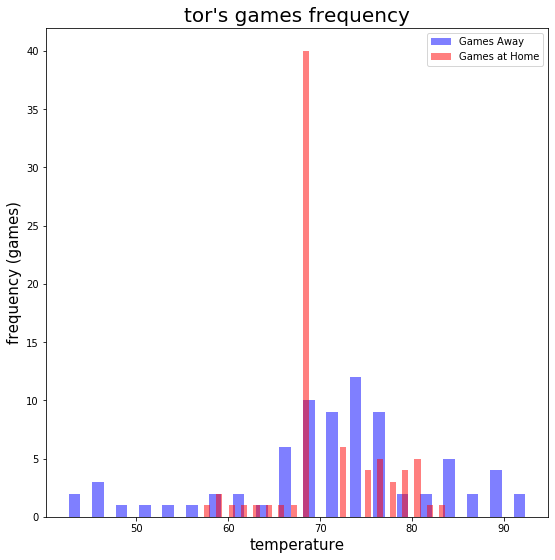

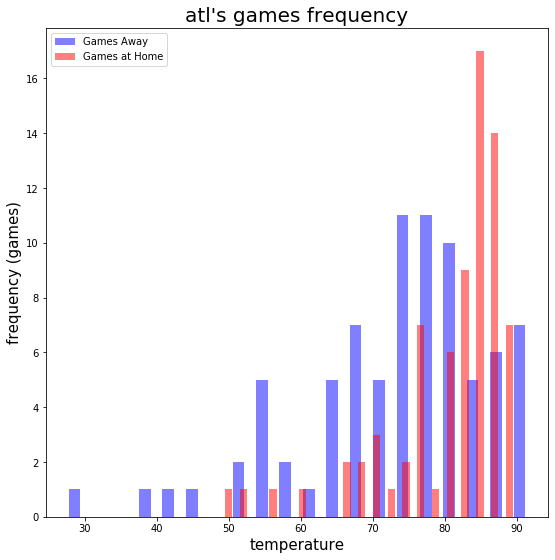

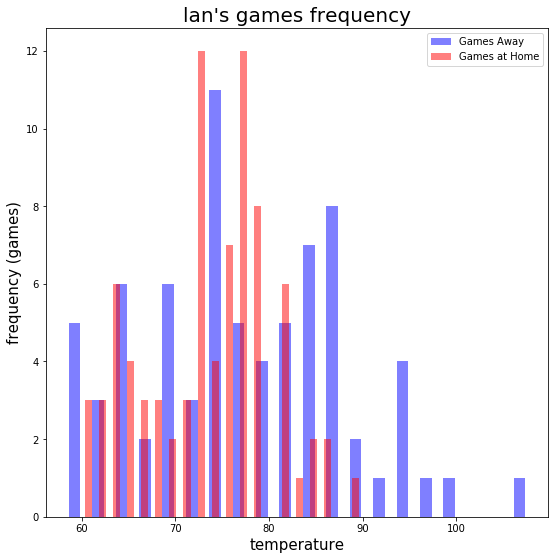

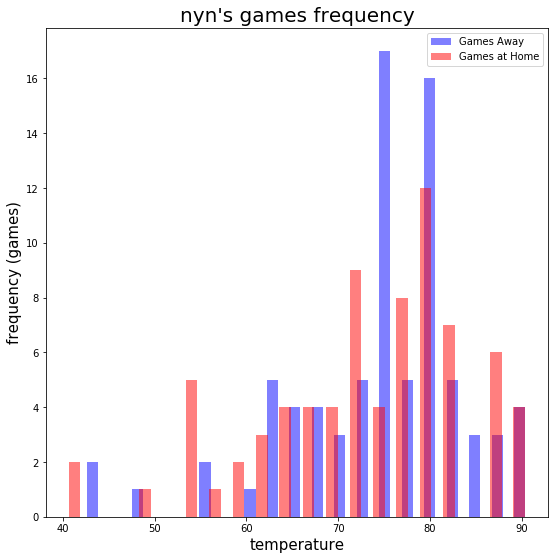

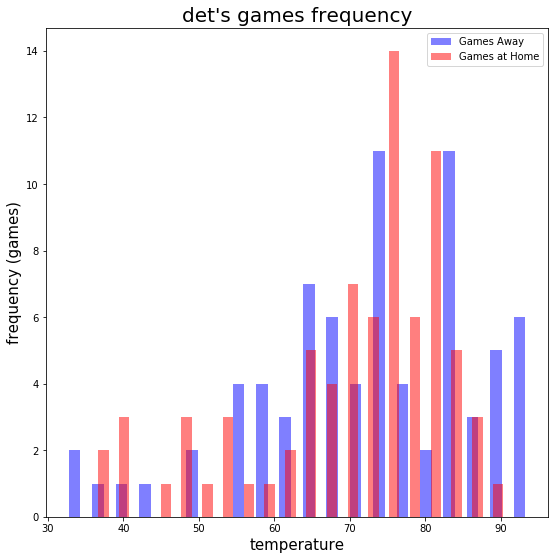

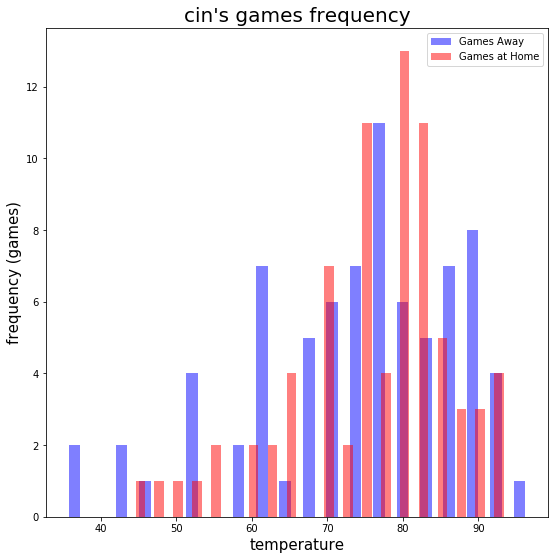

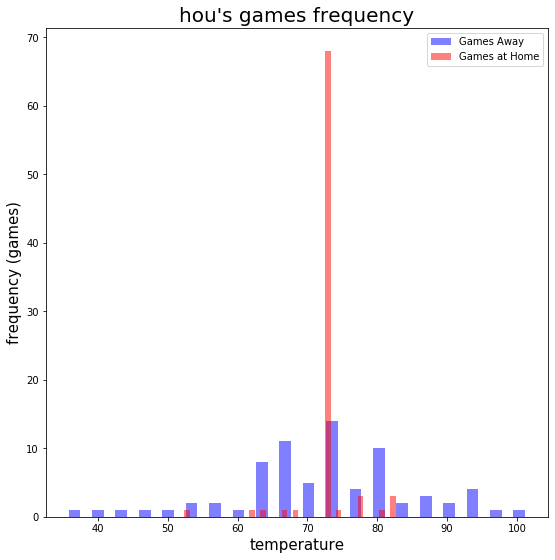

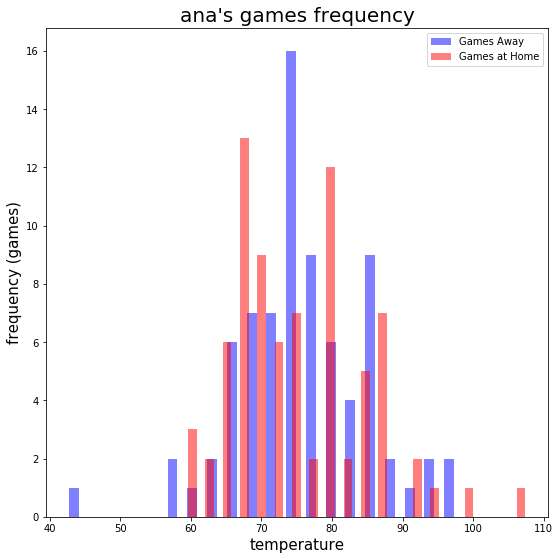

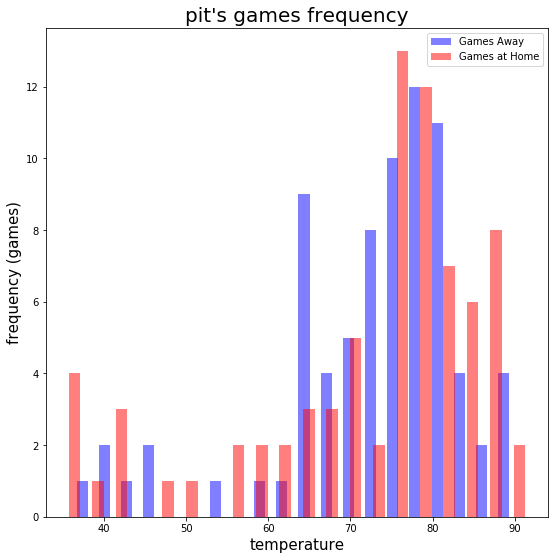

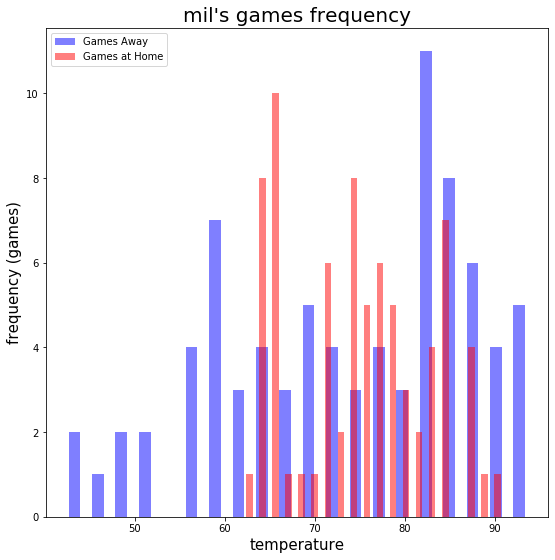

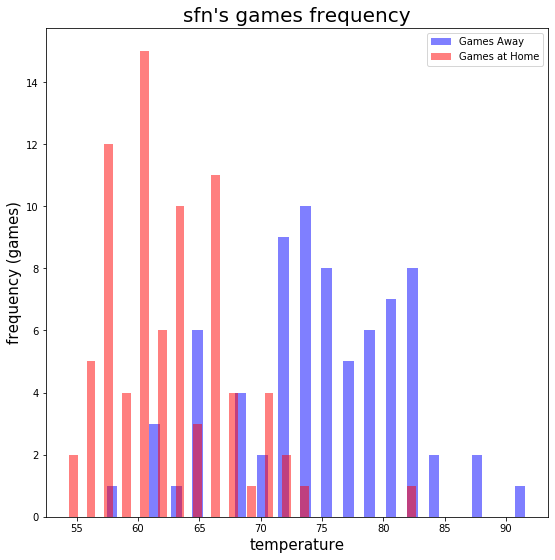

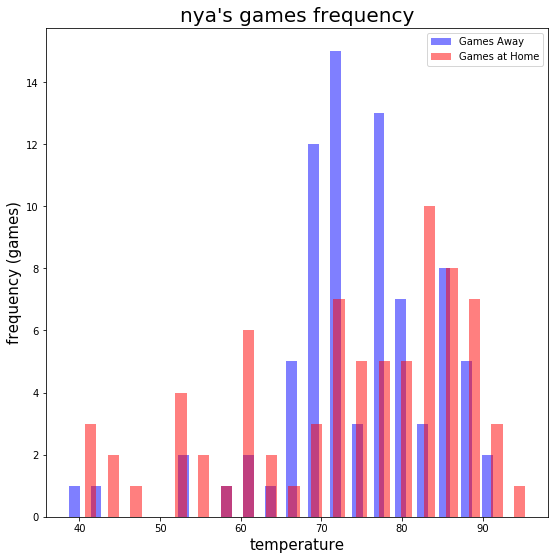

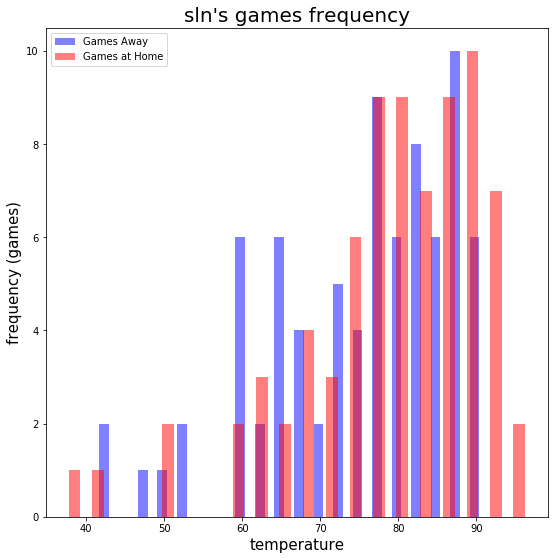

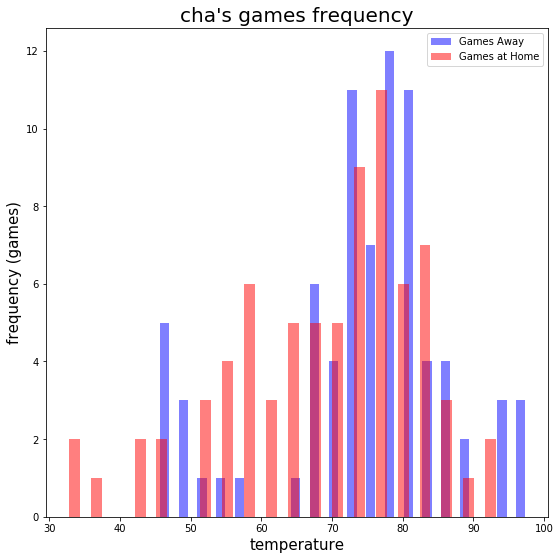

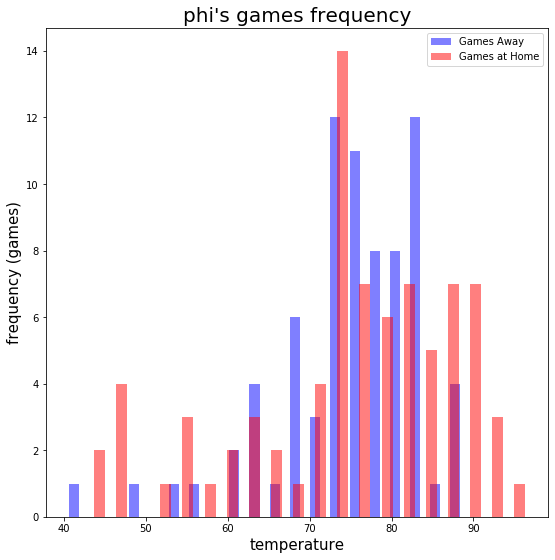

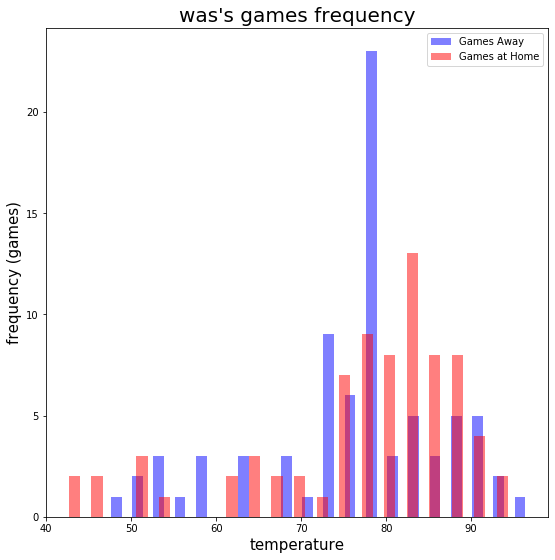

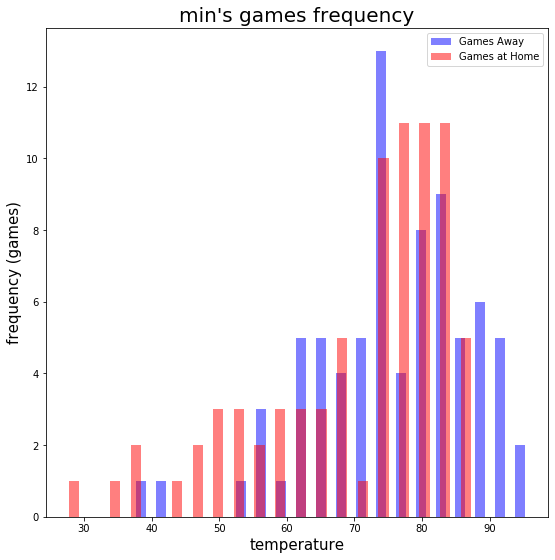

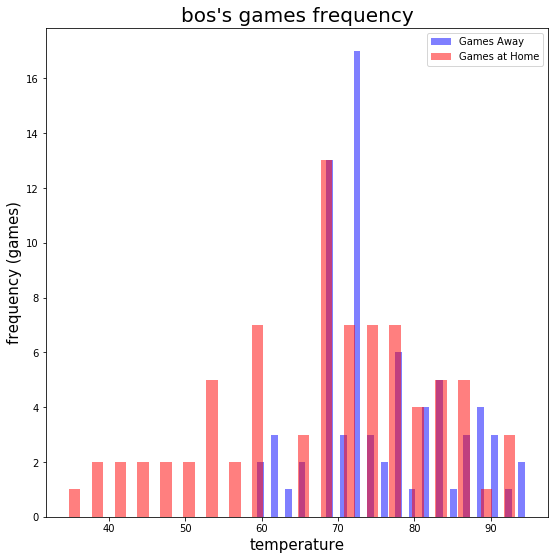

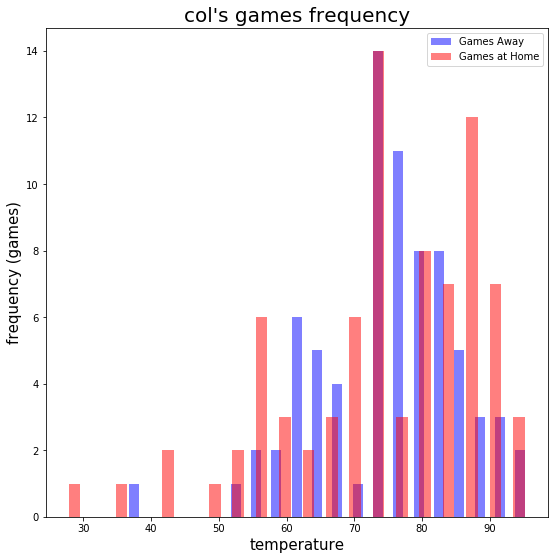

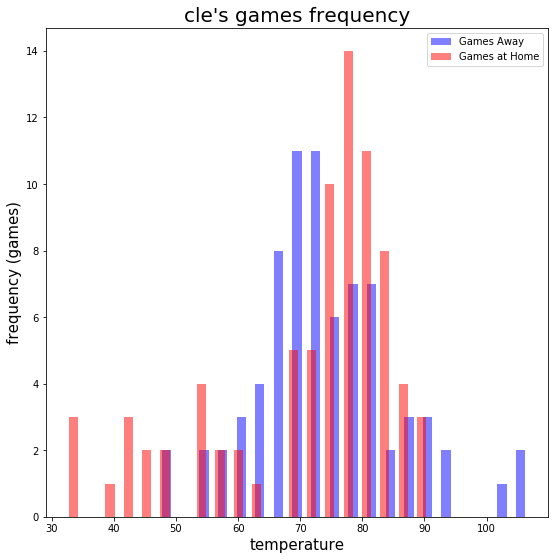

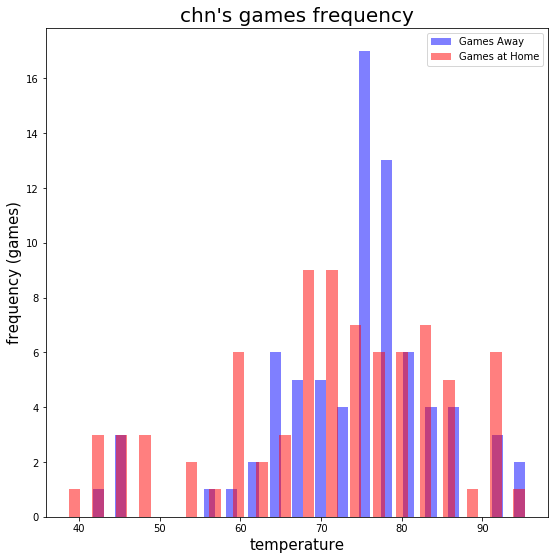

In [26]:
team_names = list(games.home_team.unique())

for name in team_names:
    #Histogram of specific teams' away games's average temperature
    by_away_team = games.groupby('away_team')
    by_home_team = games.groupby('home_team')


    #Graphing Histogram of Giant's away games' temperatures
    fig, axs = plt.subplots(figsize=(9,9))
    away = axs.hist(by_away_team.get_group(name).temperature, bins=20, color='b', rwidth=0.5, alpha=0.5)
    home = axs.hist(by_home_team.get_group(name).temperature, bins=20, color='r', rwidth=0.5, alpha=0.5)

    #Labeling
    axs.set_title("{}'s games frequency".format(name), fontsize=20)
    axs.set_ylabel('frequency (games)', fontsize=15)
    axs.set_xlabel('temperature', fontsize=15)

    plt.legend(['Games Away','Games at Home'])

 # Temperature Versus Average Attendance

Text(0.5, 0, 'Temperature')

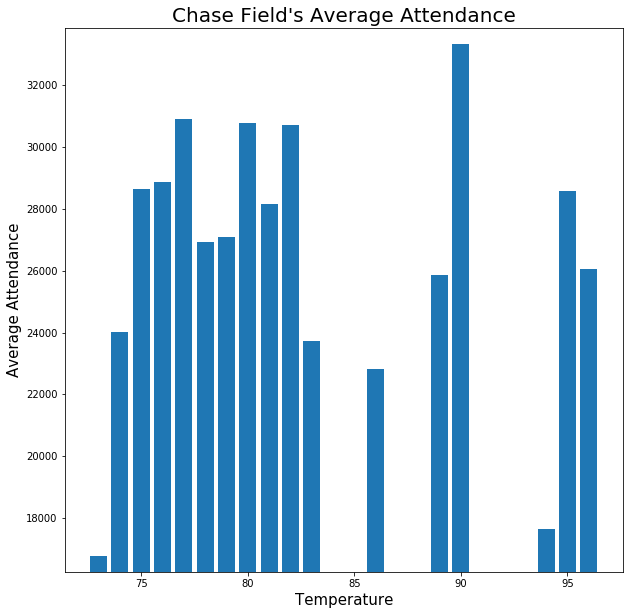

In [27]:
# average audience at each temperature
by_venue = games.groupby('venue_name')
name='Chase Field'

max_attendance = by_venue.get_group(name).attendance.max()

df1 = pd.DataFrame(by_venue.get_group(name).attendance)
df2 = pd.DataFrame(by_venue.get_group(name).temperature)

venue_attendance_temperature_withdate = pd.merge(df1,df2, on=df1.index).set_index('temperature')
venue_attendance_temperature = venue_attendance_temperature_withdate.drop(['key_0'], axis=1)
venue_attendance_temperature = venue_attendance_temperature.sort_index()

#gets average attendance for each dataframe and temperature input
def get_average(df,temp):
    d=df.groupby('temperature')
    return d.get_group(temp).mean()
#print(int(get_average(venue_attendance_temperature,72)))

venue_attendance_temperature.index.unique()

list_temp_attendance =[]
for i in venue_attendance_temperature.index.unique():
     list_temp_attendance.append([int(i),int(get_average(venue_attendance_temperature,i))])

temp_avgatt = pd.DataFrame(list_temp_attendance, columns=['temperature','average_attendance']).set_index('temperature')
mn_att = temp_avgatt.average_attendance.min()
mx_att = temp_avgatt.average_attendance.max()

fig, axs = plt.subplots(figsize=(10,10))
axs.bar(temp_avgatt.index, temp_avgatt.average_attendance)
axs.set_ylim([mn_att-500,mx_att+500])

#Labeling
axs.set_title("{}'s Average Attendance".format(name), fontsize=20)
axs.set_ylabel('Average Attendance', fontsize=15)
axs.set_xlabel('Temperature', fontsize=15)

In [28]:
venues = list(games.venue_name.unique())
print(venues)

['Oakland Coliseum', 'Tropicana Field', 'Kauffman Stadium', 'Marlins Park', 'Safeco Field', 'Chase Field', 'Globe Life Park in Arlington', 'Petco Park', 'Oriole Park at Camden Yards', 'Rogers Centre', 'SunTrust Park', 'Dodger Stadium', 'Citi Field', 'Comerica Park', 'Great American Ball Park', 'Minute Maid Park', 'Angel Stadium', 'PNC Park', 'Miller Park', 'AT&T Park', 'Yankee Stadium', 'Busch Stadium', 'Guaranteed Rate Field', 'Citizens Bank Park', 'Nationals Park', 'Target Field', 'Fenway Park', 'Coors Field', 'Progressive Field', 'Wrigley Field']


C:\Users\johnl\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


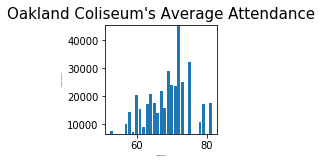

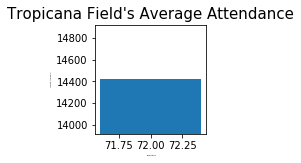

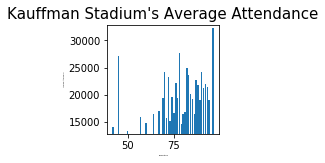

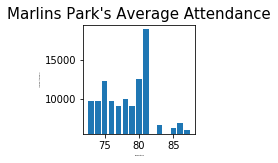

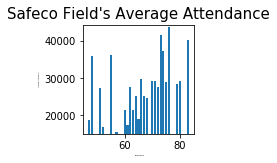

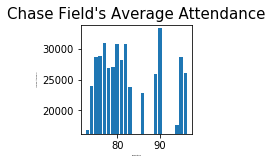

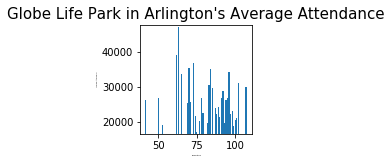

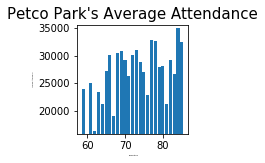

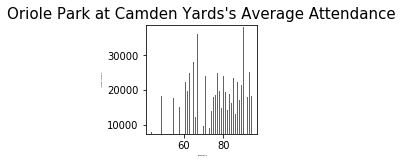

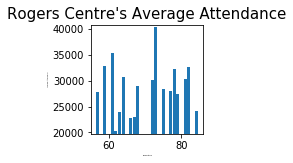

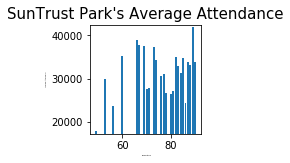

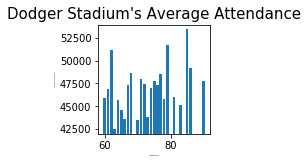

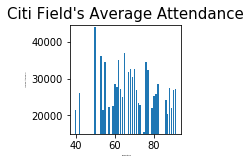

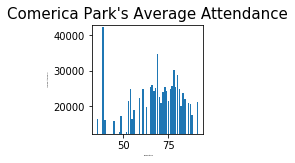

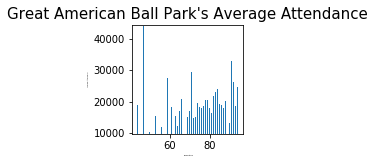

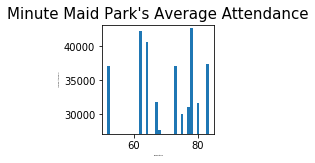

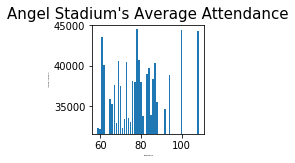

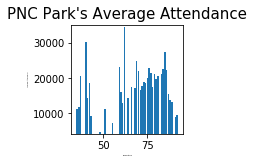

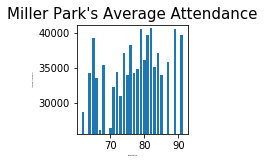

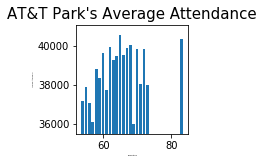

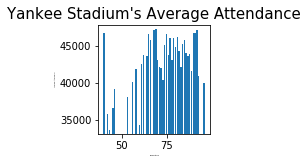

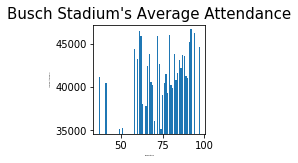

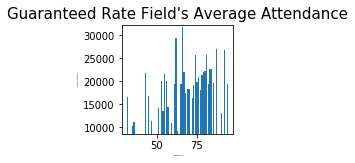

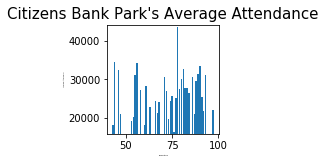

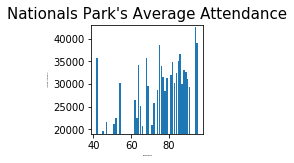

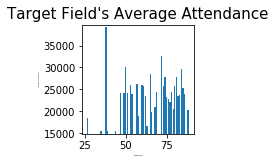

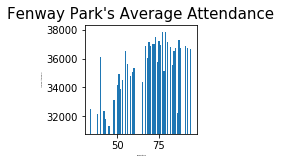

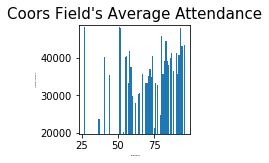

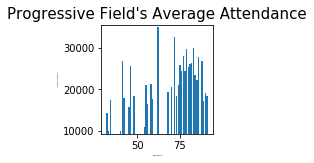

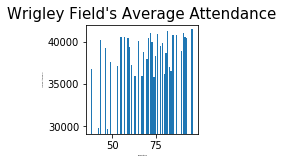

In [29]:
venues = list(games.venue_name.unique())

for i in venues:
    name=i

    # average audience at each temperature
    by_venue = games.groupby('venue_name')


    max_attendance = by_venue.get_group(name).attendance.max()

    df1 = pd.DataFrame(by_venue.get_group(name).attendance)
    df2 = pd.DataFrame(by_venue.get_group(name).temperature)

    venue_attendance_temperature_withdate = pd.merge(df1,df2, on=df1.index).set_index('temperature')
    venue_attendance_temperature = venue_attendance_temperature_withdate.drop(['key_0'], axis=1)
    venue_attendance_temperature = venue_attendance_temperature.sort_index()

    #gets average attendance for each dataframe and temperature input
    def get_average(df,temp):
        d=df.groupby('temperature')
        return d.get_group(temp).mean()
    #print(int(get_average(venue_attendance_temperature,72)))

    venue_attendance_temperature.index.unique()

    list_temp_attendance =[]
    for i in venue_attendance_temperature.index.unique():
         list_temp_attendance.append([int(i),int(get_average(venue_attendance_temperature,i))])

    temp_avgatt = pd.DataFrame(list_temp_attendance, columns=['temperature','average_attendance']).set_index('temperature')
    mn_att = temp_avgatt.average_attendance.min()
    mx_att = temp_avgatt.average_attendance.max()

    fig, axs = plt.subplots(figsize=(2,2))
    axs.bar(temp_avgatt.index, temp_avgatt.average_attendance)
    axs.set_ylim([mn_att-500,mx_att+500])

    #Labeling
    axs.set_title("{}'s Average Attendance".format(name), fontsize=15)
    axs.set_ylabel('Average Attendance', fontsize=1.5)
    axs.set_xlabel('Temperature', fontsize=1.5)